# Capstone Project - The Battle of the Neighborhoods (Week 2)
### Applied Data Science Capstone by IBM/Coursera

## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 24px">

1. [Introduction: Business Problem](#1)<br>
2. [Obtain the Subway Station Data](#2)<br>
3. [Obtain the Foursqare Vanue Data](#3)<br>
4. [Analyze the venue data] (#4)<br>
5. [Cluster the venue data] (#5) <br>
6. [Mapping the station data] (#6) <br>
7. [Obtain and Visulize Station Characteristic Data](#7)<br>
8. [Conclusion](#8)<br>
</div>

 ## Introduction: Business Problem <a id='1'></a>

Burnaby is a city in British Columbia, Canada, part of Metro Vancouver and immediately to the east of the City of Vancouver. It is the third-largest city in British Columbia by population, following Vancouver and nearby Surrey. Burnaby was incorporated in 1892 and achieved its City status in 1992, 100 years after incorporation. It is the seat of Metro Vancouver's regional government.

The main campuses of Simon Fraser University and the British Columbia Institute of Technology are located in Burnaby. Metropolis at Metrotown is the largest mall in British Columbia, and second largest in Canada. It is home to high-tech companies such as Ballard Power (fuel cell), Clio (legal software), D-Wave (quantum computing), General Fusion (fusion power), Electronic Arts Vancouver, and Capcom Canada.

The city is served by the Expo Line and the Millennium Line with total 11 stations. Metrotown station in downtown Metrotown is the second-busiest station in regional Vancouver's Skytrain system as of 2018.

The restaurant location I am going to find will appeal to the tech-students and employees of high-tech companies, it must be near a subway station, so people can easily catch up during launch or dinner time. I would also want the restaurant in the vicinity of other shops and boutiques. Smaller number of restuarants around the station will be considered an advantage to extablish a new one.  What’s more important, the customers of coffee shops and cafes would be the target market for the new restaurant. In a word, the restaurant will be a creative place for those high- tech company employees and technology students to make friends and exchange ideas. It might be an incubator of startup companies. 

Based on definition of our problem, we need to find the **data**:
*  Subway Stations' location data of Burnaby in longitude and lantitude format
*  Subway Stations' characeteristic data demonstrating employment and population status around the Stations
*  Vanues data nearby Subway Stations

## Obtain the Subway Station Data <a id="2"></a>

In [1]:
import pandas as pd

In [2]:
#dataset for subway stations' location in Burnaby
df_stations = pd.read_csv('SkyTrain_Station_burnaby.csv')
df_stations.drop(['OBJECTID'],axis =1)

,X,Y,NAME
0,-122.938732,49.254594,LAKE CITY WAY STATION
1,-123.003426,49.225616,METROTOWN STATION
2,-123.001326,49.266423,BRENTWOOD TOWN CENTRE STATION
3,-122.917920,49.253390,PRODUCTION WAY - UNIVERSITY STATION
4,-122.988630,49.220112,ROYAL OAK STATION
5,-122.963679,49.259134,SPERLING - BURNABY LAKE STATION
6,-123.012611,49.229753,PATTERSON STATION
7,-123.013687,49.264887,GILMORE STATION
8,-122.896435,49.248231,LOUGHEED TOWN CENTRE STATION
9,-122.982009,49.264734,HOLDOM STATION


## Obtatin the Foursquare Vanue Data <a id="3"></a>

Now that we have our location dataset, let's use Foursquare API to get info on the venues within 500 meters radius around each subway station and exmamine their categories.

In [3]:
import numpy as np
import json # library to handle JSON files
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

In [4]:
#@hidden_cell
CLIENT_ID = 'UXWEDPWPTWEWH0YVOCWCCOTR11CTY25TK3OPNALHQMN2YFEN' 
CLIENT_SECRET = 'D5Q2RYDAXAIGCI3O5SHQNZ4O15HJGQYXYFYAPXT3SB1P2VI4'
VERSION = '20200811' # Foursquare API version
LIMIT = 100

In [5]:
# define the function to query vanues through foursquare
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)  
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Station Name', 
                  'Station Latitude', 
                  'Station Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [6]:
station_venues = getNearbyVenues(names=df_stations['NAME'],
                                   latitudes=df_stations['Y'],
                                   longitudes=df_stations['X']
                                  )

LAKE CITY WAY STATION
METROTOWN STATION
BRENTWOOD TOWN CENTRE STATION
PRODUCTION WAY - UNIVERSITY STATION
ROYAL OAK STATION
SPERLING - BURNABY LAKE STATION
PATTERSON STATION
GILMORE STATION
LOUGHEED TOWN CENTRE STATION
HOLDOM STATION
EDMONDS STATION


In [7]:
station_venues.groupby('Station Name').count()

,Station Latitude,Station Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Station Name,,,,,,
BRENTWOOD TOWN CENTRE STATION,35,35,35,35,35,35
EDMONDS STATION,8,8,8,8,8,8
GILMORE STATION,15,15,15,15,15,15
HOLDOM STATION,18,18,18,18,18,18
LAKE CITY WAY STATION,4,4,4,4,4,4
LOUGHEED TOWN CENTRE STATION,38,38,38,38,38,38
METROTOWN STATION,48,48,48,48,48,48
PATTERSON STATION,13,13,13,13,13,13
PRODUCTION WAY - UNIVERSITY STATION,7,7,7,7,7,7


In [8]:
print('There are {} uniques categories.'.format(len(station_venues['Venue Category'].unique())))

There are 86 uniques categories.


## Analyze the venue data <a id="4"></a> 

Let's create the dataframe with the portions of categories in a descending order around a station .

In [9]:
station_onehot = pd.get_dummies(station_venues[['Venue Category']], prefix="", prefix_sep="")
station_onehot['Station Name'] = station_venues['Station Name']
# get 'Station Name' cloumn index number 
number = station_onehot.columns.get_loc('Station Name')
print(f'the dataframe has {station_onehot.shape[0]} rows,{station_onehot.shape[1]} columns, the "Station Name" column index number is {number}.')
fixed_columns = [station_onehot.columns[number]] + list(station_onehot.columns[:number])+list(station_onehot.columns[number+1:])
station_onehot = station_onehot[fixed_columns]

the dataframe has 201 rows,87 columns, the "Station Name" column index number is 86.


In [10]:
station_onehot

,Station Name,American Restaurant,Asian Restaurant,BBQ Joint,Bakery,Bank,Big Box Store,Bookstore,Bowling Alley,Breakfast Spot,...,Tea Room,Tennis Court,Thai Restaurant,Toy / Game Store,Trail,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Shop,Yoga Studio
0,LAKE CITY WAY STATION,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,LAKE CITY WAY STATION,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,LAKE CITY WAY STATION,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,LAKE CITY WAY STATION,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,METROTOWN STATION,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,EDMONDS STATION,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
197,EDMONDS STATION,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
198,EDMONDS STATION,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
199,EDMONDS STATION,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
station_grouped = station_onehot.groupby('Station Name').mean().reset_index()
station_grouped

,Station Name,American Restaurant,Asian Restaurant,BBQ Joint,Bakery,Bank,Big Box Store,Bookstore,Bowling Alley,Breakfast Spot,...,Tea Room,Tennis Court,Thai Restaurant,Toy / Game Store,Trail,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Shop,Yoga Studio
0,BRENTWOOD TOWN CENTRE STATION,0.000000,0.000000,0.000000,0.000000,0.028571,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.028571,0.028571,0.000000,0.028571,0.000000
1,EDMONDS STATION,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,GILMORE STATION,0.133333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,HOLDOM STATION,0.000000,0.055556,0.000000,0.000000,0.000000,0.000000,0.000000,0.055556,0.055556,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.055556,0.000000,0.000000,0.000000
4,LAKE CITY WAY STATION,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,LOUGHEED TOWN CENTRE STATION,0.000000,0.000000,0.026316,0.000000,0.026316,0.026316,0.000000,0.000000,0.026316,...,0.026316,0.000000,0.026316,0.000000,0.000000,0.000000,0.026316,0.000000,0.000000,0.026316
6,METROTOWN STATION,0.020833,0.041667,0.000000,0.083333,0.000000,0.000000,0.041667,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.041667,0.000000,0.020833,0.020833,0.000000,0.000000,0.000000
7,PATTERSON STATION,0.000000,0.000000,0.000000,0.000000,0.076923,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.076923,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,PRODUCTION WAY - UNIVERSITY STATION,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.142857,0.000000,0.000000,0.142857,0.000000,0.000000
9,ROYAL OAK STATION,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.083333,0.000000,0.083333,0.000000


In [12]:
# write a function to sort the venues in descending order.
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    return row_categories_sorted.index.values[0:num_top_venues]

In [13]:
# create the new dataframe and display the top 10 venues for each neighborhood.
num_top_venues = 10
indicators = ['st', 'nd', 'rd']
# create columns according to number of top venues
columns = ['Station Name']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
station_venues_sorted = pd.DataFrame(columns=columns)
station_venues_sorted['Station Name'] = station_grouped['Station Name']
for ind in np.arange(station_grouped.shape[0]):
    station_venues_sorted.iloc[ind, 1:] = return_most_common_venues(station_grouped.iloc[ind, :], num_top_venues)
station_venues_sorted

,Station Name,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,BRENTWOOD TOWN CENTRE STATION,Coffee Shop,Sushi Restaurant,Pharmacy,Pizza Place,Restaurant,Grocery Store,Wine Shop,Light Rail Station,Liquor Store,Italian Restaurant
1,EDMONDS STATION,Park,Coffee Shop,Gym / Fitness Center,Garden,Café,Bus Station,Electronics Store,Department Store,Dessert Shop,Dim Sum Restaurant
2,GILMORE STATION,American Restaurant,Coffee Shop,Japanese Restaurant,Sushi Restaurant,Deli / Bodega,Department Store,Burger Joint,Shipping Store,Fried Chicken Joint,Supermarket
3,HOLDOM STATION,Bus Stop,Sushi Restaurant,Grocery Store,Rental Service,Chinese Restaurant,Chiropractor,Diner,Breakfast Spot,Bowling Alley,Hotel
4,LAKE CITY WAY STATION,Light Rail Station,Park,Bus Stop,Sporting Goods Shop,Yoga Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner
5,LOUGHEED TOWN CENTRE STATION,Korean Restaurant,Fast Food Restaurant,Café,Sporting Goods Shop,Coffee Shop,Sushi Restaurant,Burger Joint,Farmers Market,Japanese Restaurant,Hotel
6,METROTOWN STATION,Bakery,Cosmetics Shop,Coffee Shop,Sporting Goods Shop,Electronics Store,Dessert Shop,Furniture / Home Store,Toy / Game Store,Bookstore,Asian Restaurant
7,PATTERSON STATION,Indian Restaurant,Gym / Fitness Center,Park,Pizza Place,Portuguese Restaurant,Chinese Restaurant,Sandwich Place,Japanese Restaurant,Tanning Salon,Coffee Shop
8,PRODUCTION WAY - UNIVERSITY STATION,Pizza Place,Trail,Sandwich Place,Electronics Store,Brewery,Convenience Store,Warehouse Store,Distribution Center,Cosmetics Shop,Deli / Bodega
9,ROYAL OAK STATION,Ramen Restaurant,Asian Restaurant,Vietnamese Restaurant,Wine Shop,Gym,Dessert Shop,Malay Restaurant,Light Rail Station,Noodle House,Bubble Tea Shop


## Cluster the venue data <a id="5"></a> 

Now lets use cluster function to cluster the venue data

In [14]:
from sklearn.cluster import KMeans

In [15]:
# set number of clusters
kclusters = 5
station_grouped_clustering = station_grouped.drop('Station Name', 1)
# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(station_grouped_clustering)
# check cluster labels generated for each row in the dataframe
kmeans.labels_[:] 

array([1, 0, 1, 1, 2, 1, 1, 1, 4, 1, 3])

In [16]:
# add clustering labels
station_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

In [17]:
station_venues_sorted

,Cluster Labels,Station Name,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,1,BRENTWOOD TOWN CENTRE STATION,Coffee Shop,Sushi Restaurant,Pharmacy,Pizza Place,Restaurant,Grocery Store,Wine Shop,Light Rail Station,Liquor Store,Italian Restaurant
1,0,EDMONDS STATION,Park,Coffee Shop,Gym / Fitness Center,Garden,Café,Bus Station,Electronics Store,Department Store,Dessert Shop,Dim Sum Restaurant
2,1,GILMORE STATION,American Restaurant,Coffee Shop,Japanese Restaurant,Sushi Restaurant,Deli / Bodega,Department Store,Burger Joint,Shipping Store,Fried Chicken Joint,Supermarket
3,1,HOLDOM STATION,Bus Stop,Sushi Restaurant,Grocery Store,Rental Service,Chinese Restaurant,Chiropractor,Diner,Breakfast Spot,Bowling Alley,Hotel
4,2,LAKE CITY WAY STATION,Light Rail Station,Park,Bus Stop,Sporting Goods Shop,Yoga Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner
5,1,LOUGHEED TOWN CENTRE STATION,Korean Restaurant,Fast Food Restaurant,Café,Sporting Goods Shop,Coffee Shop,Sushi Restaurant,Burger Joint,Farmers Market,Japanese Restaurant,Hotel
6,1,METROTOWN STATION,Bakery,Cosmetics Shop,Coffee Shop,Sporting Goods Shop,Electronics Store,Dessert Shop,Furniture / Home Store,Toy / Game Store,Bookstore,Asian Restaurant
7,1,PATTERSON STATION,Indian Restaurant,Gym / Fitness Center,Park,Pizza Place,Portuguese Restaurant,Chinese Restaurant,Sandwich Place,Japanese Restaurant,Tanning Salon,Coffee Shop
8,4,PRODUCTION WAY - UNIVERSITY STATION,Pizza Place,Trail,Sandwich Place,Electronics Store,Brewery,Convenience Store,Warehouse Store,Distribution Center,Cosmetics Shop,Deli / Bodega
9,1,ROYAL OAK STATION,Ramen Restaurant,Asian Restaurant,Vietnamese Restaurant,Wine Shop,Gym,Dessert Shop,Malay Restaurant,Light Rail Station,Noodle House,Bubble Tea Shop


The stations with less restaurant characteristics will be considered more suitable for a new restaurant. So from above table, we conclude that the choices of stations areas for new restaurant include LAKE CITY WAY STATION, PRODUCTION WAY-UNIVERSITY STATION, SPERLING - BURNABY LAKE STATION,EDMONDS STATION

## Mapping the station data <a id="6"></a> 

Let's mapping the stations after it is clustered by surrounding venues

In [18]:
import matplotlib.cm as cm
import matplotlib.colors as colors
import folium # map rendering library
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

In [19]:
data_merged = df_stations
# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
data_merged = pd.merge(df_stations, station_venues_sorted, left_on='NAME', right_on='Station Name')
data_merged

,X,Y,OBJECTID,NAME,Cluster Labels,Station Name,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,-122.938732,49.254594,1,LAKE CITY WAY STATION,2,LAKE CITY WAY STATION,Light Rail Station,Park,Bus Stop,Sporting Goods Shop,Yoga Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner
1,-123.003426,49.225616,2,METROTOWN STATION,1,METROTOWN STATION,Bakery,Cosmetics Shop,Coffee Shop,Sporting Goods Shop,Electronics Store,Dessert Shop,Furniture / Home Store,Toy / Game Store,Bookstore,Asian Restaurant
2,-123.001326,49.266423,3,BRENTWOOD TOWN CENTRE STATION,1,BRENTWOOD TOWN CENTRE STATION,Coffee Shop,Sushi Restaurant,Pharmacy,Pizza Place,Restaurant,Grocery Store,Wine Shop,Light Rail Station,Liquor Store,Italian Restaurant
3,-122.917920,49.253390,4,PRODUCTION WAY - UNIVERSITY STATION,4,PRODUCTION WAY - UNIVERSITY STATION,Pizza Place,Trail,Sandwich Place,Electronics Store,Brewery,Convenience Store,Warehouse Store,Distribution Center,Cosmetics Shop,Deli / Bodega
4,-122.988630,49.220112,5,ROYAL OAK STATION,1,ROYAL OAK STATION,Ramen Restaurant,Asian Restaurant,Vietnamese Restaurant,Wine Shop,Gym,Dessert Shop,Malay Restaurant,Light Rail Station,Noodle House,Bubble Tea Shop
5,-122.963679,49.259134,6,SPERLING - BURNABY LAKE STATION,3,SPERLING - BURNABY LAKE STATION,Coffee Shop,Convenience Store,Bus Station,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Distribution Center,Electronics Store
6,-123.012611,49.229753,7,PATTERSON STATION,1,PATTERSON STATION,Indian Restaurant,Gym / Fitness Center,Park,Pizza Place,Portuguese Restaurant,Chinese Restaurant,Sandwich Place,Japanese Restaurant,Tanning Salon,Coffee Shop
7,-123.013687,49.264887,8,GILMORE STATION,1,GILMORE STATION,American Restaurant,Coffee Shop,Japanese Restaurant,Sushi Restaurant,Deli / Bodega,Department Store,Burger Joint,Shipping Store,Fried Chicken Joint,Supermarket
8,-122.896435,49.248231,9,LOUGHEED TOWN CENTRE STATION,1,LOUGHEED TOWN CENTRE STATION,Korean Restaurant,Fast Food Restaurant,Café,Sporting Goods Shop,Coffee Shop,Sushi Restaurant,Burger Joint,Farmers Market,Japanese Restaurant,Hotel
9,-122.982009,49.264734,10,HOLDOM STATION,1,HOLDOM STATION,Bus Stop,Sushi Restaurant,Grocery Store,Rental Service,Chinese Restaurant,Chiropractor,Diner,Breakfast Spot,Bowling Alley,Hotel


In [20]:
# create map
geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode('Burnaby BC')
latitude = location.latitude
longitude = location.longitude

map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(data_merged['Y'], data_merged['X'], data_merged['Station Name'], data_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.Circle(
        [lat, lon],
        radius=500,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.5).add_to(map_clusters)
       
map_clusters

## Obtain and Visulize Station Characteristic Data <a id="7">

In [21]:
df_statoin1 = pd.read_csv('TSPR2019_Rail-Key Characteristics by station.csv',encoding = 'cp1252')
station_name_list = df_stations['NAME'].str.title().str.replace(' Station','').str.replace(' - ','–').tolist()
df_station_char = pd.DataFrame({'Station Name':station_name_list}).merge(df_statoin1)
df_station_char

,Station Name,Station Code,Line,Sub-Region,Platform Level,Platform Type,Platform Level.1,Faregates,Bike Parkade,Connecting Routes,POP2019 (rounded),EMP2019 (rounded),Service Change 1,Service Change 2,Service Change 3,Service Change 4,Service Change 5,Service Change 6
0,Lake City Way,LC,ML,Burnaby/New Westminster,Elevated,Side,Elevated,6,No,134; N9,2000,2000,NaN,NaN,NaN,NaN,NaN,NaN
1,Metrotown,MT,EL,Burnaby/New Westminster,Elevated,Centre,Elevated,21,Yes,19; 49; 110; 112; 116; 119; 129; 130; 144; 146...,26000,14000,"-Spring 2015, Station upgrades started","-November 2016, East stationhouse closed for u...","-March 2017, New central stationhouse opened","-July 2017, New west stationhouse opened","-March 2018, New east stationhouse opened",NaN
2,Brentwood Town Centre,BR,ML,Burnaby/New Westminster,Elevated,Side,Elevated,3,No,25; 123; 130; 134; 136; N9,14000,7000,NaN,NaN,NaN,NaN,NaN,NaN
3,Production Way–University,PW,ML,Burnaby/New Westminster,Elevated,Centre,Elevated,6,No,110; 136; 145; N9,1000,4000,"-October 2016, New Expo Line terminus with Exp...",NaN,NaN,NaN,NaN,NaN
4,Royal Oak,RO,EL,Burnaby/New Westminster,Elevated,Centre,Elevated,6,No,148,14000,5000,NaN,NaN,NaN,NaN,NaN,NaN
5,Sperling–Burnaby Lake,SP,ML,Burnaby/New Westminster,Elevated,Side,Elevated,3,No,110; 134; 144,3000,1000,NaN,NaN,NaN,NaN,NaN,NaN
6,Patterson,PT,EL,Burnaby/New Westminster,Elevated,Centre,Elevated,10,No,125; 129,17000,5000,NaN,NaN,NaN,NaN,NaN,NaN
7,Gilmore,GM,ML,Burnaby/New Westminster,Elevated,Side,Elevated,8,No,28; 129,8000,10000,NaN,NaN,NaN,NaN,NaN,NaN
8,Lougheed Town Centre,LH,ML,Burnaby/New Westminster,Elevated,Centre & side,Elevated,12,No,101; 109; 110; 136; 152; 156; 157; 180; 555; N9,15000,12000,"-October, 2016, New platform opened as tempora...","-December 2, 2016, Millennium Line Evergreen E...","-June 25, 2018, Platform assignments changed f...",NaN,NaN,NaN
9,Holdom,HO,ML,Burnaby/New Westminster,Elevated,Side,Elevated,3,No,129; 133; 136; N9,7000,2000,NaN,NaN,NaN,NaN,NaN,NaN


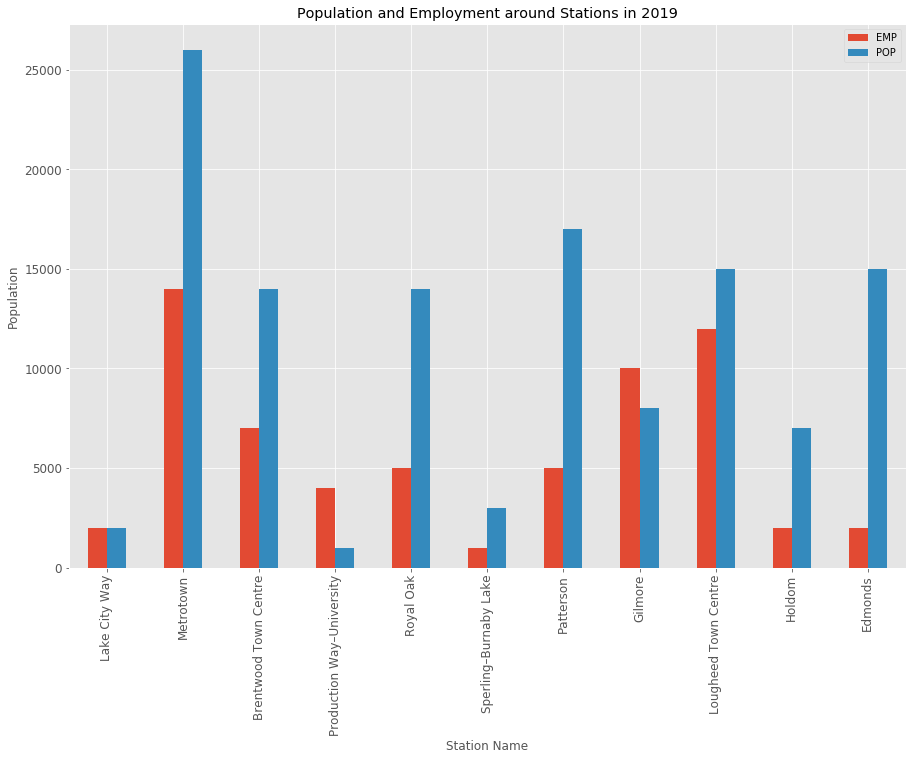

In [22]:
import matplotlib as mpl
import matplotlib.pyplot as plt

df_station_char.rename(columns={'EMP2019 (rounded)':'EMP','POP2019 (rounded)':'POP'}, inplace=True)
plt.style.use('ggplot')
ax = df_station_char[['EMP','POP']].plot(kind='bar', title ="Population and Employment around Stations in 2019",figsize=(15,10),legend=True, fontsize=12)
ax.set_xlabel("Station Name",fontsize=12)
ax.set_ylabel("Population",fontsize=12)
ax.set_xticklabels(df_station_char['Station Name'])
plt.show()

Station areas with more population and employment will be considered better choice for a new restaurant. From above bar graph, we can see that Metrotown, Brentwood Town Center,Royal Oak, Patterson,Gilmore, Lougheed Town Center, Edmonds are among our choices.

## Conclusion <a id="8">

Purpose of this project was to identify station areas suitable for a restaurant. By clustering venues stations into five categories, we have found that the Cluster1 stations have most characteristics of surrounding by restaurants. So Cluster 0,2,3,4 stations would be more suitable to have the new station. Comparing those stations with employment and population data, the final decission on optimal restaurant location will be the **Edmonds Station** area. 
